In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

%matplotlib inline


Read files: vmtable, deployment

In [2]:
data_path = 'data/vmtable/vmtable.csv'
headers=['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecount', 'vmmemory']
trace_dataframe = pd.read_csv(data_path, header=None, index_col=False,names=headers,delimiter=',')

deployment_data_path = 'data/deployments/deployments.csv'
deployment_headers=['deploymentid','deploymentsize']
deployment_trace_dataframe = pd.read_csv(deployment_data_path, header=None, index_col=False,names=deployment_headers,delimiter=',')

subscription_data_path = 'data/subscriptions/subscriptions.csv'
subscription_headers=['subscriptionid','firstcreated','vmcount']
subscription_trace_dataframe = pd.read_csv(subscription_data_path, header=None, index_col=False,names=subscription_headers,delimiter=',')
# convert timestamp to date

#Compute VM Lifetime based on VM Created and VM Deleted timestamps and transform to Hour
trace_dataframe['lifetime'] = np.maximum((trace_dataframe['vmdeleted'] - trace_dataframe['vmcreated']),300)/ 3600

trace_dataframe['corehour'] = trace_dataframe['lifetime'] * trace_dataframe['vmcorecount']
trace_dataframe.head(100)

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,719.916667,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,427.583333,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,111.916667,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,719.916667,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,607.916667,607.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,yD50gomnSYWUPN3alsrbMZXSXMHR7C/vmUBw/M4uVJ2/ce...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.567225,26.132131,98.557046,Delay-insensitive,8,56.00,719.916667,5759.333333
96,2/1Kbb3ZhUmRUkbUBr8H7+vbjUIk5CTY5kHjAdjTBt0bF6...,dBub/K+8I6jD9t2ExqUdRNlVxPPvDWqICA9Sr+yzcBZ/nN...,C9GnRqFF2lzW/elUsLEwhyAQj9D/d5JIOOgvwfPL1aINf+...,1353000,1356600,97.433669,21.772330,97.433669,Unkown,1,1.75,1.000000,1.000000
97,j0iwV7yMSgoXRpeGEeskzCPsY/dZBNIB5JoXXHh7eYEprj...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,393600,99.490785,29.964337,98.202218,Interactive,8,56.00,109.333333,874.666667
98,EpchDXRYRQpxvKAO3h2jFFrnDgxbHwruWxm3hwpqnb8fqB...,dBub/K+8I6jD9t2ExqUdRNlVxPPvDWqICA9Sr+yzcBZ/nN...,C9GnRqFF2lzW/elUsLEwhyAQj9D/d5JIOOgvwfPL1aINf+...,512700,513600,87.570093,43.341229,87.570093,Delay-insensitive,1,1.75,0.250000,0.250000


In [3]:
trace_dataframe.describe()

,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcorecount,vmmemory,lifetime,corehour
count,2.013767e+06,2.013767e+06,2.013767e+06,2.013767e+06,2.013767e+06,2.013767e+06,2.013767e+06,2.013767e+06,2.013767e+06
mean,1.318097e+06,1.504673e+06,7.233878e+01,1.513443e+01,5.901889e+01,2.563461e+00,6.069098e+00,5.182909e+01,1.180946e+02
std,7.806214e+05,7.535789e+05,3.385232e+01,1.534389e+01,3.561021e+01,2.380495e+00,1.062382e+01,1.691052e+02,5.031816e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.500000e-01,8.333333e-02,8.333333e-02
25%,6.573000e+05,8.880000e+05,4.918151e+01,3.438740e+00,2.509601e+01,1.000000e+00,1.750000e+00,2.500000e-01,3.333333e-01
50%,1.411200e+06,1.571100e+06,9.087399e+01,1.045594e+01,6.931068e+01,2.000000e+00,3.500000e+00,6.666667e-01,1.416667e+00
75%,1.990800e+06,2.155350e+06,9.856823e+01,2.136583e+01,9.437023e+01,4.000000e+00,7.000000e+00,6.583333e+00,1.266667e+01
max,2.591700e+06,2.591700e+06,1.000000e+02,1.000000e+02,1.000000e+02,1.600000e+01,1.120000e+02,7.199167e+02,1.151867e+04


因为数据采样周期是30天，从上面的分析结果发现，有些数据的vmdeleted时间和采样终止时间相同，可以认为采样结束后该vm并没有被删除。但是不能简单的把这些数据删掉，这样可能会影响数据的准确性。后面需要考虑使用生存分析方法来处理。

In [4]:
trace_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013767 entries, 0 to 2013766
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   vmid            object 
 1   subscriptionid  object 
 2   deploymentid    object 
 3   vmcreated       int64  
 4   vmdeleted       int64  
 5   maxcpu          float64
 6   avgcpu          float64
 7   p95maxcpu       float64
 8   vmcategory      object 
 9   vmcorecount     int64  
 10  vmmemory        float64
 11  lifetime        float64
 12  corehour        float64
dtypes: float64(6), int64(3), object(4)
memory usage: 199.7+ MB


In [5]:
trace_dataframe['vmcategory'].value_counts()

Unkown               1172597
Delay-insensitive     780488
Interactive            60682
Name: vmcategory, dtype: int64

In [6]:
subscription_trace_dataframe.describe()

,firstcreated,vmcount
count,5.958000e+03,5958.000000
mean,1.033952e+05,337.993790
std,3.857817e+05,3562.628063
min,0.000000e+00,1.000000
25%,0.000000e+00,2.000000
50%,0.000000e+00,10.000000
75%,0.000000e+00,49.000000
max,2.587200e+06,128047.000000


In [7]:
vmtotal = subscription_trace_dataframe["vmcount"].sum()
print("Total Number of Virtual Machines in the Dataset subscriptions: %d" % vmtotal)

Total Number of Virtual Machines in the Dataset subscriptions: 2013767


In [8]:
vm_count = trace_dataframe.shape[0]
subscription_count = trace_dataframe['subscriptionid'].unique().shape[0]
deployment_count = trace_dataframe['deploymentid'].unique().shape[0]
total_vm_hour_available = trace_dataframe['lifetime'].sum()
total_core_hour_available = trace_dataframe['corehour'].sum()

print("Total Number of VM in the Dataset vmtable: %d" % vm_count)
print("Total Number of Subscriptions in the Dataset vmtable: %d" % subscription_count)
print("Total Number of Deployments in the Dataset vmtable: %d" % deployment_count)
print("Total VM Hours Available in the Dataset vmtable: %f" % total_vm_hour_available)
print("Total Core Hours Available in the Dataset vmtable: %f" % total_core_hour_available)

Total Number of VM in the Dataset vmtable: 2013767
Total Number of Subscriptions in the Dataset vmtable: 5958
Total Number of Deployments in the Dataset vmtable: 35941
Total VM Hours Available in the Dataset vmtable: 104371713.416667
Total Core Hours Available in the Dataset vmtable: 237815104.750000


Plot functions

In [33]:
TraceLegend = "Azure V1 - Public Dataset V1"

def CPUPlot(df):
    counts_AVG = pd.DataFrame(df.groupby('avgcpu').size().rename('Freq')).reset_index()
    counts_P95 = pd.DataFrame(df.groupby('p95maxcpu').size().rename('Freq')).reset_index()
    counts_AVG = counts_AVG.rename(columns={'avgcpu': 'Bucket'})
    counts_P95 = counts_P95.rename(columns={'p95maxcpu': 'Bucket'})
    counts_AVG['cum'] = counts_AVG['Freq'].cumsum() / counts_AVG['Freq'].sum() * 100
    counts_P95['cum'] = counts_P95['Freq'].cumsum() / counts_P95['Freq'].sum() * 100
    ax = counts_AVG.plot(x='Bucket', y='cum',linestyle='--', color='b', title="VM CPU Utilization",\
        logx=False, legend=True, ylim=(0,100), yticks=range(0,110,20))
    counts_P95.plot(x='Bucket', y='cum', linestyle='--', logx=False, color='b', ax=ax)
    ax.text(9, 85, 'Average', size=11, weight='bold')
    ax.text(50, 45, 'P95 Max',  size=11, weight='bold')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('CPU Utilization (%)')
    ax.set_ylabel('CDF')
    ax.set_xlim([1,100])
    ax.legend([TraceLegend], loc='best');
    ax.minorticks_off()

    
def LifetimePlot(df):
    counts_lifetime = pd.DataFrame(df.groupby(['lifetime','vmcategory']).size().rename('Freq')).reset_index()
    counts_lifetime = counts_lifetime.rename(columns={'lifetime': 'bucket'})
    counts_lifetime['cum'] = counts_lifetime['Freq'].cumsum() / counts_lifetime['Freq'].sum() * 100
    ax = counts_lifetime[counts_lifetime['vmcategory']=='Interactive'].plot(x='bucket', y='cum', title="VM Lifetime",logx=False, legend=True, ylim=(0,100), yticks=range(0,110,10))
    counts_lifetime[counts_lifetime['vmcategory']=='Delay-insensitive'].plot(x='bucket', y='cum', title="VM Lifetime",logx=False, legend=True, ylim=(0,100), yticks=range(0,110,10),ax=ax)
    # azurev1[0:2500].plot(x='bucket', y='value', linestyle='-', color='darkmagenta', logx=False, ax=ax)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('Lifetime (Hours)')
    ax.set_ylabel('CDF')
    ax.set_xlim([1,48])
    ax.legend([TraceLegend], loc='best');

# def LifetimePlot(df):
#     counts_lifetime = pd.DataFrame(df.groupby(['lifetime','vmcategory']).size().rename('Freq')).reset_index()
#     counts_lifetime['cum'] = counts_lifetime['Freq'].cumsum() / counts_lifetime['Freq'].sum() * 100
#     plt.figure(figsize=(10, 5))
#     plt.title("Distribution of VM create time")
#     ax = sns.lineplot(x="lifetime", y="cum", hue='vmcategory', data=counts_lifetime)
#     ax.yaxis.set_ticks_position('left')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.set_xlabel('Lifetime (Hours)')
#     ax.set_ylabel('CDF')
#     ax.set_xlim([1,100])
#     plt.show()

def DeploymentPlot(df):
    counts_deployment = pd.DataFrame(df.groupby('deploymentsize').size().rename('Freq')).reset_index()
    counts_deployment = counts_deployment.rename(columns={'deploymentsize': 'bucket'})
    counts_deployment.to_csv('deployment.txt', sep='\t', index=False)
    counts_deployment['cum'] = counts_deployment['Freq'].cumsum() / counts_deployment['Freq'].sum() * 100
    ax = counts_deployment[0:50].plot(x='bucket', y='cum',linestyle='--', color='b', title="Deployment Size",logx=False, legend=True, ylim=(0,100), yticks=range(0,110,20))
    # azurev1.plot(x='bucket', y='value', linestyle='-', color='darkmagenta', logx=False, ax=ax)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('# VMs')
    ax.set_ylabel('CDF')
    ax.set_xlim([1,50])
    ax.legend([TraceLegend], loc='best');
    
def MemoryPlot(df):
    # dataset = (df['vmmemory'].value_counts(normalize=True)*100).sort_index().T
    # result = pd.concat([dataset], axis=0)#.fillna(0)
    # ax = result.plot.bar(stacked=True, ylim=(0,100), title='VM Memory Distribution', width=0.5, align='center')
    
    dataset = pd.DataFrame(df.groupby(['vmcategory', 'vmmemory']).size().rename('count')).reset_index()
    ax = sns.barplot(x='vmmemory',y='count',data=dataset, hue='vmcategory')
    ax.legend(title='Memory Size (GB)', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4);
    ax.set_ylabel('% of VMs')

def CorePlot(df):
    # dataset = (df['vmcorecount'].value_counts(normalize=True)*100).sort_index().T
    # result = pd.concat([dataset], axis=0)#.fillna(0)
    # ax = result.plot.bar(stacked=True, ylim=(0,100), title='VM Cores Distribution', width=0.5, align='center')
    
    dataset = pd.DataFrame(df.groupby(['vmcategory', 'vmcorecount']).size().rename('count')).reset_index()
    ax = sns.barplot(x='vmcorecount',y='count',data=dataset, hue='vmcategory')
    ax.set_ylabel('% of VMs')
    ax.legend(title='Core Count', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5);

def CategoryPlot(df):
    dataset = pd.DataFrame(df.groupby('vmcategory')['corehour'].sum().rename('corehour'))
    dataset = dataset.rename(columns={'vmcategory': 'Bucket'})
    dataset['value'] = dataset['corehour']/dataset['corehour'].sum() * 100
    dataset= dataset.drop('corehour', 1)
    dataset = dataset.sort_index().T
    ax = dataset.plot.bar(stacked=True, title='VM Category Distribution', color=['lightskyblue', 'orange', '0.75'], ylim=(0,100))
    ax.set_ylabel('% of core hours')
    ax.set_xticklabels([TraceLegend], rotation=0)
    ax.legend(["Delay-insensitive", "Interactive", "Unknown"], loc='upper center', title='Categories', bbox_to_anchor=(0.5, -0.10), ncol=3, fontsize=10.5);
    

def VMCreateRequestTimePlot(df):
    # drop VMs created before observation start
    df = df[df['firstcreated'] > 0]
    df["firstcreated"] = df["firstcreated"] // 86400
    dataset = pd.DataFrame(df.groupby('firstcreated')["vmcount"].sum()).reset_index()
    plt.figure(figsize=(10, 5))
    plt.title("Distribution of VM request")
    sns.lineplot(x="firstcreated", y="vmcount", data=dataset)
    plt.show()

def VMCreateTimePlot(df):
    # drop VMs created before observation start
    df = df[df['vmcreated'] > 0]
    df["vmcreated"] = df["vmcreated"] // 86400
    dataset = pd.DataFrame(df.groupby(['vmcreated','vmcategory']).agg({"corehour":"sum"}).reset_index().rename(columns={'corehour':'deploymentcount'}))
    plt.figure(figsize=(10, 5))
    plt.title("Distribution of VM create time")
    sns.lineplot(x="vmcreated", y="deploymentcount", hue='vmcategory', data=dataset)
    plt.show()

def VMCreateTimeCorePlot(df):
    # drop VMs created before observation start
    df = df[df['vmcreated'] > 0]
    df["vmcreated"] = df["vmcreated"] // 86400
    dataset = pd.DataFrame(df.groupby(['vmcreated','vmcategory','vmcorecount']).size().rename('count')).reset_index()
    plt.figure(figsize=(10, 5))
    plt.title("Distribution of VM create time and core/memory")
    sns.scatterplot(x="vmcreated", y="vmcorecount", size="count", sizes=(20,800), hue='vmcategory', data=dataset)
    plt.show()

def VMCreateTimeMemoryPlot(df):
    # drop VMs created before observation start
    df = df[df['vmcreated'] > 0]
    df["vmcreated"] = df["vmcreated"] // 86400
    # dataset = pd.DataFrame(df.groupby(['vmcreated','vmcategory']).size().rename('vmcount')).reset_index()
    plt.figure(figsize=(10, 5))
    plt.title("Distribution of VM create time and core/memory")
    sns.scatterplot(x="vmcreated", y="vmmemory", hue='vmcategory', data=df)
    plt.show()

def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

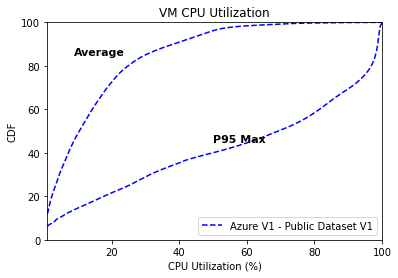

In [15]:
CPUPlot(trace_dataframe)

70%的VM平均CPU利用率低于20%  
40%的VM95分位CPU利用率低于50%  
很大一部分VM拥有较低的CPU利用率，平均CPU利用率不能充分反应VM工作负载的全部特征，因此应该采用95分位的利用率


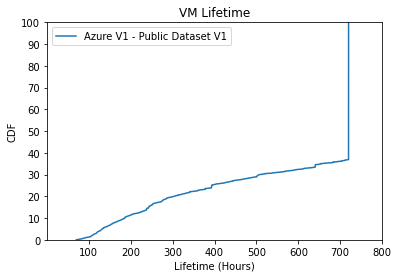

In [16]:
trace_dataframe_interactive = trace_dataframe[trace_dataframe['vmcategory'] == 'Interactive'] 
LifetimePlot(trace_dataframe_interactive)

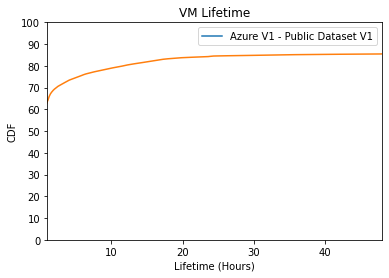

In [34]:
trace_dataframe_delayinsensitive = trace_dataframe[trace_dataframe['vmcategory'] == 'Delay-insensitive'] 
LifetimePlot(trace_dataframe_delayinsensitive)
# LifetimePlot(trace_dataframe)

很大一部分比例的VM运行时间不超过一天  
如果VM运行超过一天，那它很可能也会运行更长时间

C:\Users\hanfuqiang\AppData\Local\Temp\ipykernel_13380\1886105003.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset= dataset.drop('corehour', 1)


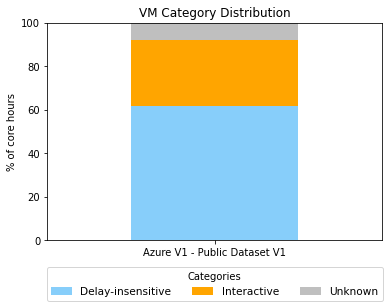

In [18]:
CategoryPlot(trace_dataframe)

60%左右的VM任务为非交互型  

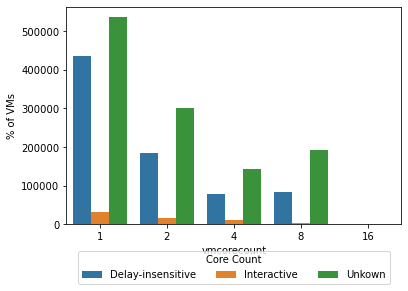

In [19]:
CorePlot(trace_dataframe)

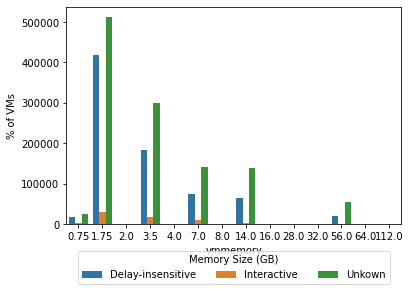

In [20]:
MemoryPlot(trace_dataframe)

C:\Users\hanfuqiang\AppData\Local\Temp\ipykernel_13380\1886105003.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["firstcreated"] = df["firstcreated"] // 86400


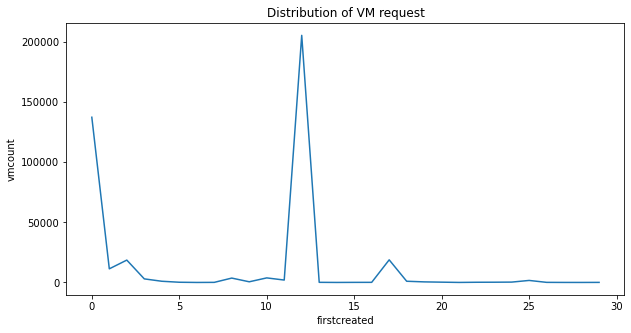

In [21]:

# subscription_trace_dataframe["firstcreated"] = subscription_trace_dataframe["firstcreated"] // 86400
VMCreateRequestTimePlot(subscription_trace_dataframe)

从上面的分布图来看，用户批量创建vm的请求不符合任何分布特征

C:\Users\hanfuqiang\AppData\Local\Temp\ipykernel_13380\1886105003.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vmcreated"] = df["vmcreated"] // 86400


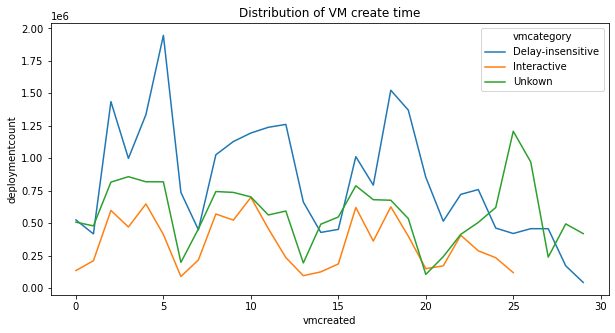

In [22]:
VMCreateTimePlot(trace_dataframe)

C:\Users\hanfuqiang\AppData\Local\Temp\ipykernel_13380\1886105003.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vmcreated"] = df["vmcreated"] // 86400


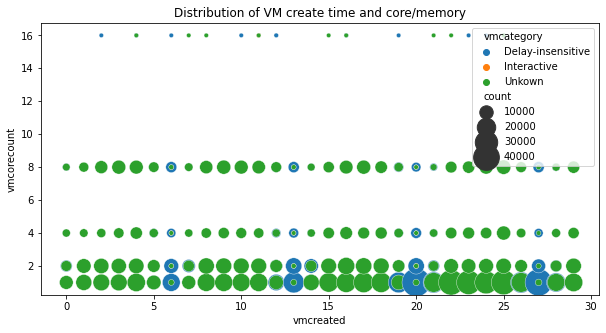

In [23]:
VMCreateTimeCorePlot(trace_dataframe)

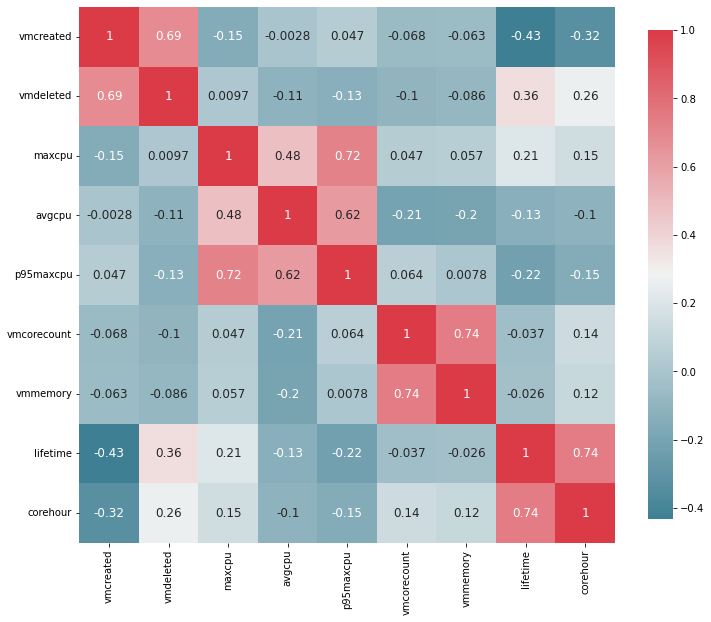

In [24]:
plot_correlation_map(trace_dataframe)

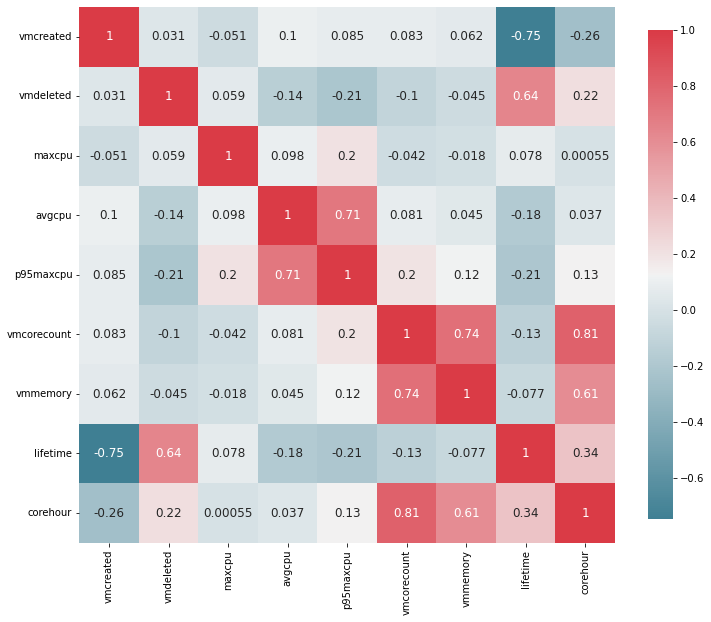

In [25]:
plot_correlation_map(trace_dataframe_interactive)

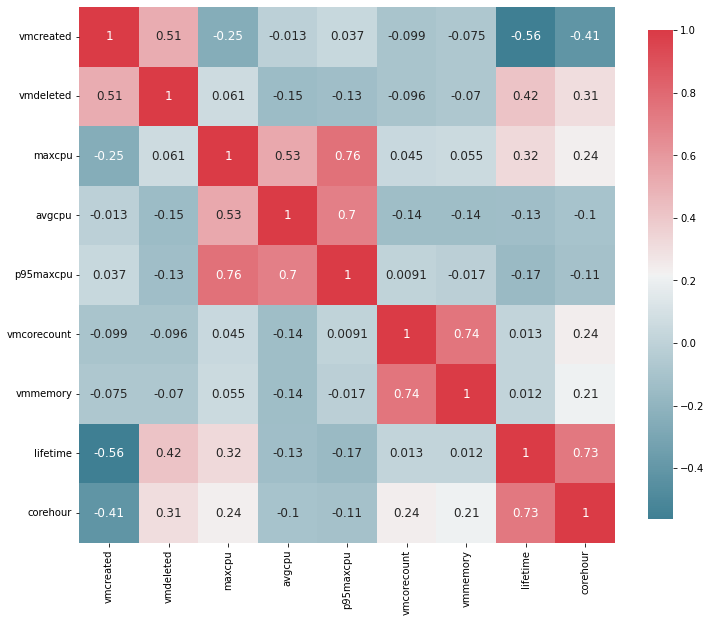

In [26]:
plot_correlation_map(trace_dataframe_delayinsensitive)

SOSP17论文中所用的数据和公开数据存在一些明显差异，最重要的一点是，SOSP17数据包含第一方和第三方VM，而公开数据只包含第一方VM。["The traces are sanitized subsets of the first-party VM workload in one of Azure’s geographical regions."](https://github.com/Azure/AzurePublicDataset)，根据SOSP17论文，第一方数据包含更多IaaS VM，第三方包含更多PaaS VM。

In [27]:
import torch
import pytorch_lightning as pl
from pytorch_forecasting import TimeSeriesDataSet



C:\Users\hanfuqiang\AppData\Roaming\Python\Python39\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (SMAPE). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
